<a href="https://colab.research.google.com/github/andvides/ML_kmerBin/blob/main/ML_kmerBin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
CAMI_dataset='4mers_table_low.csv';
test_size=0.2;
colores=['lightblue','coral','lightcoral','lightgreen']


# **cami_dataset**


In [15]:
def namesGen():
  names=[]
  names.append('Seq_id')
  for i in range(256):
    name='Kmer_'+str(i)
    names.append(name)
  names.append('Tax_id')
  return names

In [16]:
def printInfo(df_input):
  print(df_input.head())
  print('...')
  print(df_input.tail())
  print(df_input.describe())
  print(df_input.info())

In [17]:
import pandas as pd
import collections
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
names=namesGen()
df = pd.read_csv(CAMI_dataset,names=names)
printInfo(df)

        Seq_id  Kmer_0  Kmer_1  Kmer_2  Kmer_3  Kmer_4  Kmer_5  Kmer_6  \
0     RL|S1|C0       0       0       0       0       1       0       2   
1     RL|S1|C1       7       7       7       6       3       4       3   
2    RL|S1|C10       0       2       3       3       2       1       1   
3   RL|S1|C100      14       9       6      15       5       5       6   
4  RL|S1|C1000      13       6      10       6       5       8       7   

   Kmer_7  Kmer_8  ...  Kmer_247  Kmer_248  Kmer_249  Kmer_250  Kmer_251  \
0       2       8  ...         1         1         0         0         0   
1       4       2  ...         8         5         4         1         3   
2       3       1  ...         2         1         1         4         1   
3       8       1  ...        13         8        11         6         8   
4       5       7  ...         4         4        22         6         9   

   Kmer_252  Kmer_253  Kmer_254  Kmer_255   Tax_id  
0         0         0         0         0    

# **Normalización**

In [18]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
#Tax_id to class number 
i=1
finalClass={}
numClass=len(df['Tax_id'].unique())
for items in df['Tax_id'].unique():
  finalClass[items]=i
  i+=1
print(finalClass)
for values in finalClass:
  df['Tax_id'] = df['Tax_id'].replace([values],finalClass[values])

#Normalizing numeric features and converting back to dataframe
numeric_feats= names[1:-1]
df_categ_feats = df.drop(columns = numeric_feats)
df_numeric_feats = pd.DataFrame(df, columns = numeric_feats)
min_max_scaler = preprocessing.MinMaxScaler()
normalized_numeric_feats = min_max_scaler.fit_transform(df_numeric_feats)
normalized_numeric_feats = pd.DataFrame(normalized_numeric_feats, columns = numeric_feats, index=df_categ_feats.index)
df_numeric_norm = pd.concat([df_categ_feats, normalized_numeric_feats], axis=1)
printInfo(df_numeric_norm)

{75309: 1, 328515: 2, 29580: 3, 1004304: 4, 266: 5, 1120996: 6, 404881: 7, 1121301: 8, 1121884: 9, 1123349: 10, 1120989: 11, 644383: 12, 990712: 13, 2088: 14, 1123243: 15, 1122156: 16, 1123015: 17, 173053: 18, 2371: 19, 1122187: 20, 1385: 21, 1121393: 22, 1121885: 23, 1121001: 24, 2037: 25}
        Seq_id  Tax_id    Kmer_0    Kmer_1    Kmer_2    Kmer_3    Kmer_4  \
0     RL|S1|C0       1  0.000000  0.000000  0.000000  0.000000  0.000169   
1     RL|S1|C1       2  0.000614  0.001171  0.001141  0.000703  0.000506   
2    RL|S1|C10       3  0.000000  0.000335  0.000489  0.000351  0.000337   
3   RL|S1|C100       4  0.001228  0.001506  0.000978  0.001756  0.000843   
4  RL|S1|C1000       3  0.001140  0.001004  0.001630  0.000703  0.000843   

     Kmer_5    Kmer_6    Kmer_7  ...  Kmer_246  Kmer_247  Kmer_248  Kmer_249  \
0  0.000000  0.000278  0.000538  ...  0.000366  0.000165  0.000118  0.000000   
1  0.000941  0.000417  0.001076  ...  0.000000  0.001316  0.000592  0.000697   
2  0.000235

1     5347
2     2488
3     2946
4     4188
5      237
6     1898
7       23
8      760
9       56
10     149
11     340
12      94
13      27
14     233
15      25
16      77
17      84
18      41
19      72
20      22
21      87
22     109
23      69
24      87
25       6
Name: Tax_id, dtype: int64


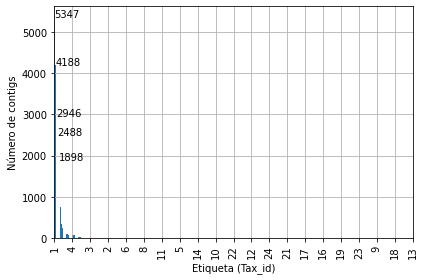

In [19]:
import matplotlib.pyplot as plt
import numpy as np
print(df_numeric_norm['Tax_id'].value_counts().sort_index())
ax=df_numeric_norm['Tax_id'].value_counts().plot(kind='bar')
for p in ax.patches:
  if p.get_height()>1400:
    ax.annotate(str(int(p.get_height())), (p.get_x(), p.get_height()))

plt.xticks(np.arange(0,310, step=15))
plt.ylabel('Número de contigs')
plt.xlabel('Etiqueta (Tax_id)')
plt.grid()
plt.tight_layout()
#plt.savefig("cami_high_taxID_freq.png", dpi=300)


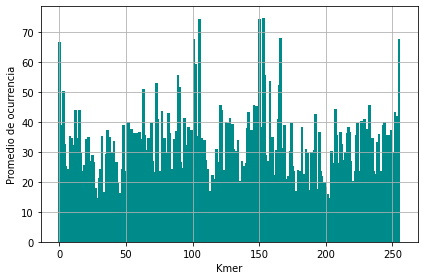

In [20]:
import matplotlib.pyplot as plt
i=0
for (columnName, columnData) in df.iteritems(): 
  if(columnName.startswith('Kmer_')):
    #print('Colunm Name : ', columnName) 
    plt.bar(i,color='darkcyan',height=df[columnName].mean(),width=2)
    i+=1
plt.ylabel('Promedio de ocurrencia')
plt.xlabel('Kmer')
plt.grid()
plt.tight_layout()
#plt.savefig("cami_high_kmer_freq.png", dpi=300)

# **Clasificadores**

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as skm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets, metrics
import collections, numpy
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
x=df_numeric_norm.drop(['Seq_id','Tax_id'], axis=1)
y=df_numeric_norm['Tax_id'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
print('X_train size: ',len(X_train))
print('X_test size: ',len(X_test))
print()
print("Total clases en data train:\n",collections.Counter(y_train));
print("Total clases en data test:\n",collections.Counter(y_test));

X_train size:  15572
X_test size:  3893

Total clases en data train:
 Counter({1: 4300, 4: 3361, 3: 2359, 2: 1976, 6: 1519, 8: 598, 11: 273, 14: 193, 5: 187, 10: 114, 22: 87, 12: 73, 17: 68, 21: 67, 24: 64, 16: 62, 19: 57, 23: 54, 9: 44, 18: 34, 15: 22, 13: 20, 7: 18, 20: 16, 25: 6})
Total clases en data test:
 Counter({1: 1047, 4: 827, 3: 587, 2: 512, 6: 379, 8: 162, 11: 67, 5: 50, 14: 40, 10: 35, 24: 23, 22: 22, 12: 21, 21: 20, 17: 16, 16: 15, 19: 15, 23: 15, 9: 12, 18: 7, 13: 7, 20: 6, 7: 5, 15: 3})


In [23]:
def runClassifier(modelo, name):
  modelo.fit(X_train, y_train)
  y_pred= modelo.predict(X_test)
  df_result=pd.DataFrame(skm.classification_report(y_test,y_pred,output_dict=True))
  df_result=df_result.T
  labels=[]
  labels.append(1)
  for i in range(len(collections.Counter(y_test))+1):
    i+=1
    if i%20==0:
      labels.append(i)
    else:  
      labels.append('')
  #print(df_result)
  #print(confusion_matrix(y_test, y_pred))
  plot_confusion_matrix(modelo, X_test, y_test,include_values=False,
                      xticks_rotation='vertical',normalize='pred', 
                      cmap='Blues',colorbar=True,values_format='.2',display_labels=labels) 
  #metrics.plot_roc_curve(modelo, X_test, y_test) 
  plt.savefig(CAMI_dataset+'_'+name+"_confusionMatrix.svg",format='svg')
  return df_result

**KNN**

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

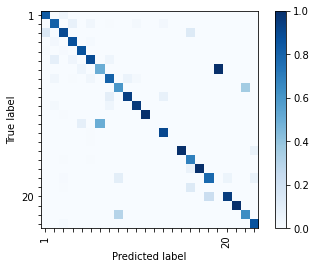

In [24]:
knn = KNeighborsClassifier(n_jobs=-1)
df_knn=runClassifier(knn,'knn')

**Random Forest classifier**

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

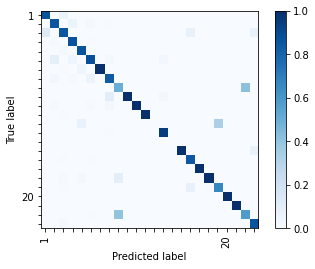

In [25]:
rf = RandomForestClassifier(n_jobs=-1)
df_rf=runClassifier(rf,'rf')

**Logistic_Regression_classifier**

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

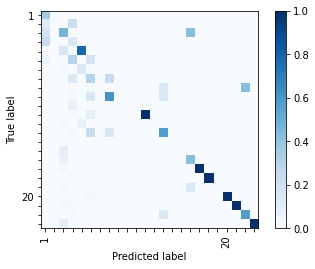

In [26]:
LR = LogisticRegression(n_jobs=-1)
df_lr=runClassifier(LR,'lr')

**Neuronal Network**

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and

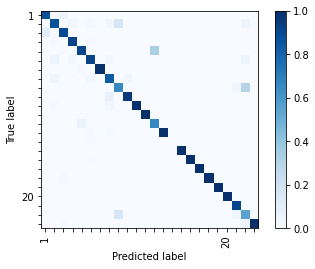

In [27]:
mlp=MLPClassifier()
df_nn=runClassifier(mlp,'nn')

# **F1-score plot**

In [28]:
def plotF1_score(df_in,name,color):
  df_plot=df_in.drop(['accuracy','macro avg','weighted avg'])
  x=df_plot.index
  #df_plot=df_plot.sort_values(by=['support'])
  #print(df_plot)

  y=df_plot['f1-score'].sort_values()
  plt.plot(x,y,label=name,color=color)

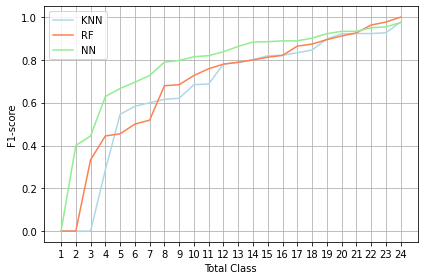

In [29]:
plotF1_score(df_knn,'KNN',colores[0])
plotF1_score(df_rf,'RF',colores[1])
#plotF1_score(df_lr,'LR',colores[2])
plotF1_score(df_nn,'NN',colores[3])
plt.grid()
plt.xlabel('Total Class')
plt.ylabel('F1-score')
plt.legend()
plt.tight_layout()
#plt.savefig(CAMI_dataset+"_f1_support.png", dpi=300)

In [30]:
def plotF1andsupp(df_in,name,color):
  df_plot=df_in.drop(['accuracy','macro avg','weighted avg'])
  x=df_plot.index
  df_plot=df_plot.sort_values(by=['f1-score'])
  y=df_plot['f1-score']
  s=df_plot['support']
  s=500*(s/max(s))
  plt.scatter(x,y,s=s,color=color)


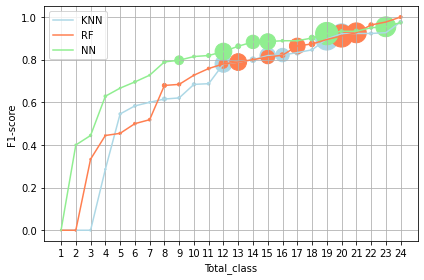

In [31]:
plotF1andsupp(df_knn,'KNN',colores[0])
plotF1_score(df_knn,'KNN',colores[0])
plotF1andsupp(df_rf,'RF',colores[1])
plotF1_score(df_rf,'RF',colores[1])
#plotF1andsupp(df_lr,'LR',colores[2])
#plotF1_score(df_lr,'LR',colores[2])
plotF1andsupp(df_nn,'NN',colores[3])
plotF1_score(df_nn,'NN',colores[3])
plt.grid()
plt.xlabel('Total_class')
plt.ylabel('F1-score')
plt.legend()
plt.tight_layout()
#plt.savefig(CAMI_dataset+"_f1andsize.svg", format='svg')

In [32]:
def histF1score(df_in,name):
  df_plot=df_in.drop(['accuracy','macro avg','weighted avg'])
  df_plot['f1-score'].plot.hist(bins=12, alpha=0.5, label=name)

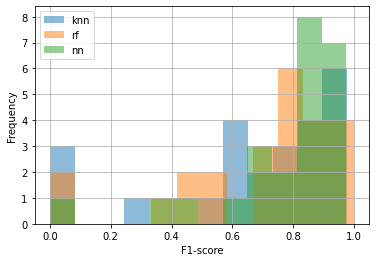

In [33]:
histF1score(df_knn,'knn')
histF1score(df_rf,'rf')
#histF1score(df_lr,'lr')
histF1score(df_nn,'nn')
plt.grid()
plt.xlabel('F1-score')
#plt.ylabel('')
plt.legend()
#plt.savefig(CAMI_dataset+"_f1Hist.svg", format='svg')

In [34]:
def plotF1andtaxid(df_in,name):
  df_plot=df_in.drop(['accuracy','macro avg','weighted avg'])
  #df_plot=df_plot.sort_values(by=['f1-score'],ascending=True)
  x=df_plot.index
  y=df_plot['f1-score']
  s=df_plot['support']
  s=1000*(s/max(s))
  plt.scatter(y,x,label=name,marker='.',s=s)

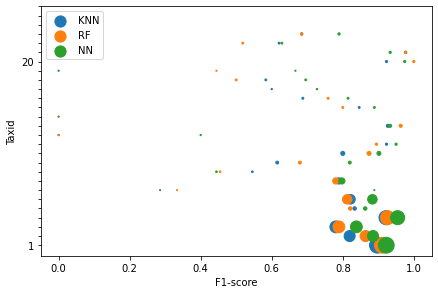

In [35]:
plotF1andtaxid(df_knn,'KNN')
plotF1andtaxid(df_rf,'RF')
#plotF1andtaxid(df_lr,'lr')
plotF1andtaxid(df_nn,'NN')
labels=[]
locs=[]
labels.append(1)
for i in range(len(df_nn['support'])):
  locs.append(i)
  i+=1
  if i%20==0: 
    labels.append(i)
  else:  
    labels.append('')
#locs, labels2 =plt.xticks() 
plt.yticks(locs,labels) 
plt.tight_layout()
#plt.grid()
plt.ylabel('Taxid')
plt.xlabel('F1-score')
plt.legend()
plt.savefig(CAMI_dataset+"_taxId_f1andsize.svg", format='svg')